In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sentimentdataset.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [3]:
df[['Hashtag1', 'Hashtag2']] = df['Hashtags'].fillna('').str.lower().str.split(expand=True, n=1)

In [4]:
top_comtag = df['Hashtags'].value_counts().head(10).index.tolist()
print(top_comtag)

[' #Compassionate #TearsOfEmpathy ', ' #Proud #ScalingPeaks ', ' #Hopeful #SeedsOfOptimism ', ' #Playful #CarnivalEscapade ', ' #Contentment #TranquilWaters ', ' #Inspired #TalesToTheStars ', ' #Inspired #CloudsOfCreativity ', ' #Dismissive #IndifferencePerformance ', ' #Indifference #DriftingThroughLife       ', ' #Shame #Injustice                           ']


In [5]:
top_indtag = pd.concat([df['Hashtag1'], df['Hashtag2']]).value_counts().head(10)
top_indtag = top_indtag.index.tolist()
print(top_indtag)

['#serenity', '#gratitude', '#excitement', '#despair', '#nostalgia', '#contentment', '#curiosity', '#hopeful', '#awe', '#grief']


In [6]:
engagement_comtag = df.groupby('Hashtags')[['Likes', 'Retweets']].mean().sort_values(by='Likes', ascending=False)
print(engagement_comtag)

                                                  Likes  Retweets
Hashtags                                                         
#Motivation #FitnessGoals                          80.0      40.0
#Joy #SimpleMoments                                80.0      40.0
#Thrill #CulturalCelebration                       80.0      40.0
#Disappointment #SoccerDefeats                     80.0      40.0
#Enthusiasm #JustinBieber                          80.0      40.0
...                                                 ...       ...
#SickDay #Health                                   15.0       7.0
#Grief #Loss                                       15.0       8.0
#Numbness #EmotionalShield                         15.0       8.0
#Traffic #Morning                                  10.0       5.0
#Despair #Struggle                                 10.0       5.0

[697 rows x 2 columns]


In [7]:
indtag_engagement = []

for tag in top_indtag:
    mask = (df['Hashtag1'] == tag) | (df['Hashtag2'] == tag)
    avg_likes = df.loc[mask, 'Likes'].mean()
    avg_retweets = df.loc[mask, 'Retweets'].mean()
    indtag_engagement.append({'Hashtag': tag, 'Likes': avg_likes, 'Retweets': avg_retweets})

In [8]:
engagement_indtag = pd.DataFrame(indtag_engagement)
engagement_indtag = engagement_indtag.sort_values(by='Likes', ascending=False)
print(engagement_indtag)

        Hashtag      Likes   Retweets
2   #excitement  54.583333  27.166667
5  #contentment  49.100000  24.600000
1    #gratitude  46.538462  23.230769
8          #awe  44.444444  22.333333
0     #serenity  42.400000  21.133333
9        #grief  39.444444  19.666667
6    #curiosity  38.800000  19.400000
4    #nostalgia  36.363636  18.000000
3      #despair  35.636364  17.909091
7      #hopeful  28.888889  14.444444


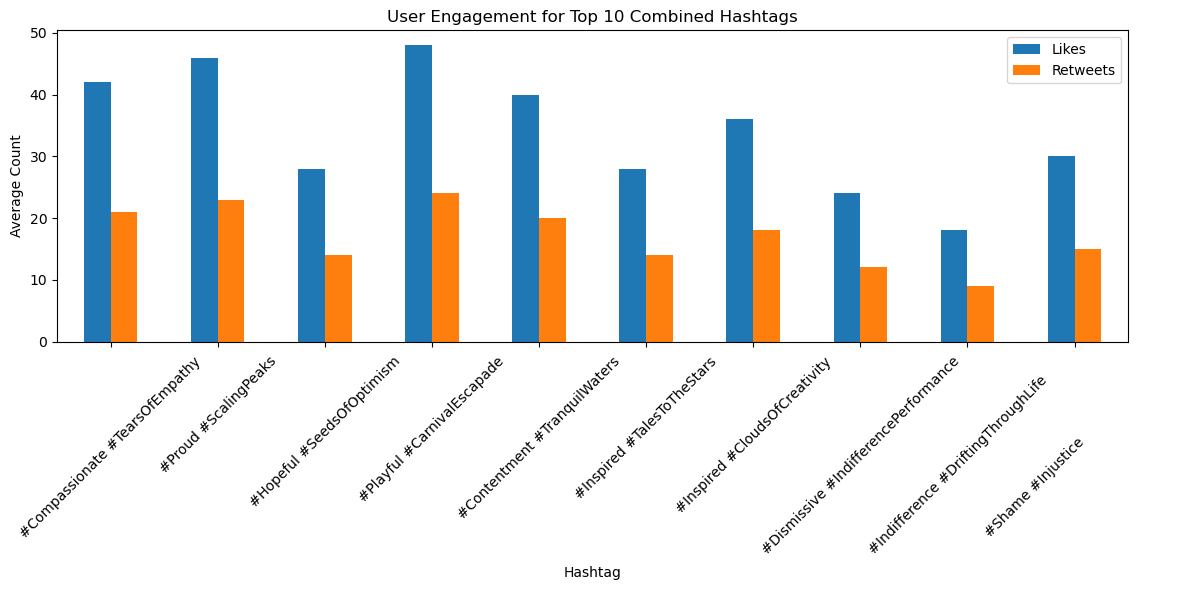

In [9]:
top_engcom = engagement_comtag.loc[top_comtag]

top_engcom.plot(kind='bar', figsize=(12, 6))
plt.title('User Engagement for Top 10 Combined Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.legend(['Likes', 'Retweets'])
plt.tight_layout()
plt.show()

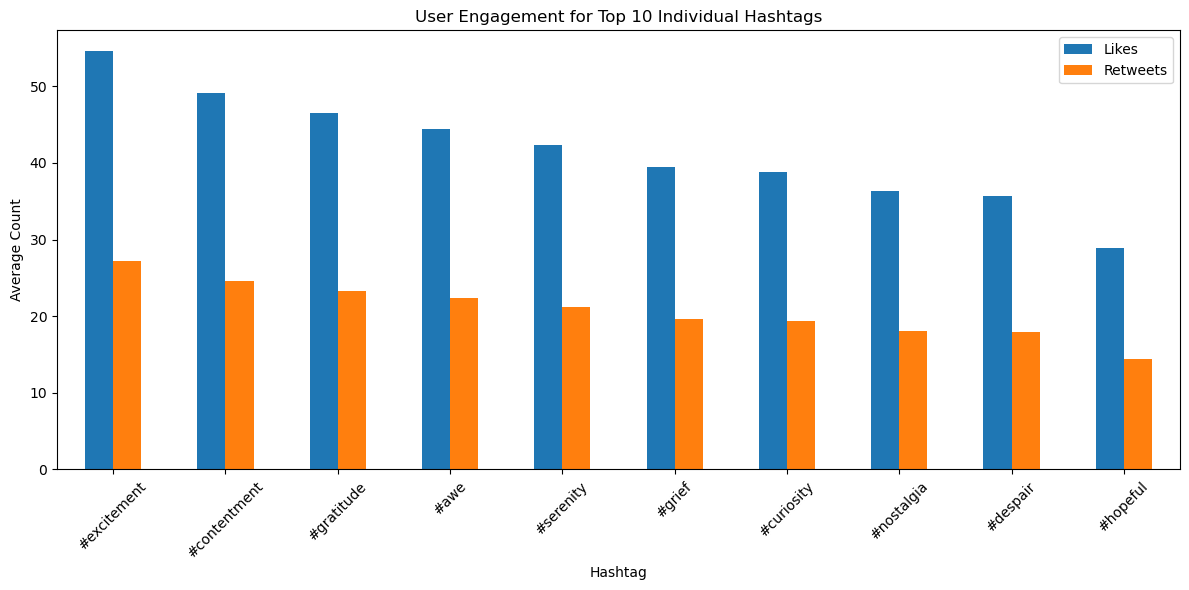

In [10]:
engagement_indtag.set_index('Hashtag')[['Likes', 'Retweets']].plot(kind='bar', figsize=(12, 6))

plt.title('User Engagement for Top 10 Individual Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.legend(['Likes', 'Retweets'])
plt.tight_layout()
plt.show()

In [11]:
df['Sentiment'].nunique()

279

In [12]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [13]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Hashtag1,Hashtag2
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,#nature,#park
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,#traffic,#morning
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,#fitness,#workout
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,#travel,#adventure
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,#cooking,#food


In [14]:
df['hashtag_text'] = df['Hashtag1'] + ' ' + df['Hashtag2']

class_counts = df['Sentiment'].value_counts()
valid_classes = class_counts[class_counts >= 5].index
df = df[df['Sentiment'].isin(valid_classes)]

vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(df['hashtag_text'])

In [15]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['Sentiment'])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

model = xgb.XGBClassifier(
    objective='multi:softmax',
    eval_metric='mlogloss',
    use_label_encoder=False
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

                   precision    recall  f1-score   support

 Acceptance             0.00      0.00      0.00         1
 Ambivalence            0.00      0.00      0.00         1
             Bad        0.00      0.00      0.00         1
      Bitterness        0.00      0.00      0.00         1
 Confusion              0.00      0.00      0.00         1
     Contentment        0.00      0.00      0.00         3
   Contentment          0.00      0.00      0.00         1
       Curiosity        0.00      0.00      0.00         2
 Curiosity              0.00      0.00      0.00         1
         Despair        0.00      0.00      0.00         1
 Determination          0.00      0.00      0.00         1
   Elation              0.00      0.00      0.00         1
     Embarrassed        0.00      0.00      0.00         2
   Empowerment          0.00      0.00      0.00         1
   Enthusiasm           0.00      0.00      0.00         1
      Excitement        0.00      0.00      0.00       

C:\Users\zhous\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:53:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\zhous\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\zhous\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\zhous\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarn

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd

In [18]:
num_clusters = 5  # or 10, depending on how many groups you want
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_vec)

df['cluster'] = clusters

for i in range(num_clusters):
    print(f"\nCluster {i}:")
    print(df[df['cluster'] == i]['hashtag_text'].head(10))


Cluster 0:
0     #nature #park                            
2     #fitness #workout                        
3     #travel #adventure                       
5       #gratitude #positivevibes              
6     #rainydays #cozy                         
7      #movienight #mustwatch                  
12     #cityexplore #hiddengems                
13     #newyear #fitnessgoals                  
15     #reflection #future                     
16     #petadoption #furryfriend               
Name: hashtag_text, dtype: object

Cluster 1:
715    #communityservice #highschoolvolunteer 
Name: hashtag_text, dtype: object

Cluster 2:
32             #coding #enthusiasm                   
119    #enthusiasm #newproject                       
132    #enthusiasm #creativity                       
146     #enthusiasm #artisticproject                 
159     #enthusiasm #homeimprovement                 
361         #enthusiasm #skillbuilding               
Name: hashtag_text, dtype: object

Cluster 3:

C:\Users\zhous\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\zhous\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\zhous\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\zhous\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\zhous\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
       

In [19]:
def print_top_terms_per_cluster(vectorizer, kmeans_model, n_terms=10):
    terms = vectorizer.get_feature_names_out()
    order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
    for i in range(num_clusters):
        print(f"\nCluster {i} top terms:")
        for idx in order_centroids[i, :n_terms]:
            print(f"  {terms[idx]}")

print_top_terms_per_cluster(vectorizer, kmeans)


Cluster 0 top terms:
  contentment
  serenity
  hopeful
  gratitude
  loneliness
  excitement
  curiosity
  playful
  elation
  joy

Cluster 1 top terms:
  communityservice
  highschoolvolunteer
  yearningforconnection
  highschoolbakes
  handstandchallenge
  happinessinfood
  healthyliving
  heartwarmingmoments
  hiddengem
  hiddengems

Cluster 2 top terms:
  enthusiasm
  creativity
  homeimprovement
  coding
  artisticproject
  newproject
  skillbuilding
  yearningforconnection
  highschoolathlete
  highschoolawkward

Cluster 3 top terms:
  highschooltension
  cafeteriadrama
  yearningforconnection
  highschoolbakes
  handstandchallenge
  happinessinfood
  healthyliving
  heartwarmingmoments
  hiddengem
  hiddengems

Cluster 4 top terms:
  newpost
  blogging
  yearningforconnection
  highschoolcelebration
  happinessinfood
  healthyliving
  heartwarmingmoments
  hiddengem
  hiddengems
  highschoolactor


In [20]:
sentiments = df['Sentiment'].unique()

sentiment_df = pd.DataFrame(sentiments, columns=['Sentiment'])

vectorizer = TfidfVectorizer()
sentiment_vec = vectorizer.fit_transform(sentiment_df['Sentiment'])

In [21]:
num_sentiment_clusters = 5  # or 8
kmeans_sentiment = KMeans(n_clusters=num_sentiment_clusters, random_state=42)
sentiment_clusters = kmeans_sentiment.fit_predict(sentiment_vec)

sentiment_df['sentiment_cluster'] = sentiment_clusters

In [22]:
df = df.merge(sentiment_df, how='left', left_on='Sentiment', right_on='Sentiment')
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Hashtag1,Hashtag2,hashtag_text,cluster,sentiment_cluster
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,#nature,#park,#nature #park,0,4
1,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,#fitness,#workout,#fitness #workout,0,4
2,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,#travel,#adventure,#travel #adventure,0,4
3,5,5,Feeling grateful for the little things in lif...,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16,9,#gratitude,#positivevibes,#gratitude #positivevibes,0,4
4,6,6,Rainy days call for cozy blankets and hot coc...,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16,14,#rainydays,#cozy,#rainydays #cozy,0,4


In [23]:
X = df[['cluster']]
y = df['sentiment_cluster']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        49
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         9

    accuracy                           0.74        66
   macro avg       0.15      0.20      0.17        66
weighted avg       0.55      0.74      0.63        66



C:\Users\zhous\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\zhous\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\zhous\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


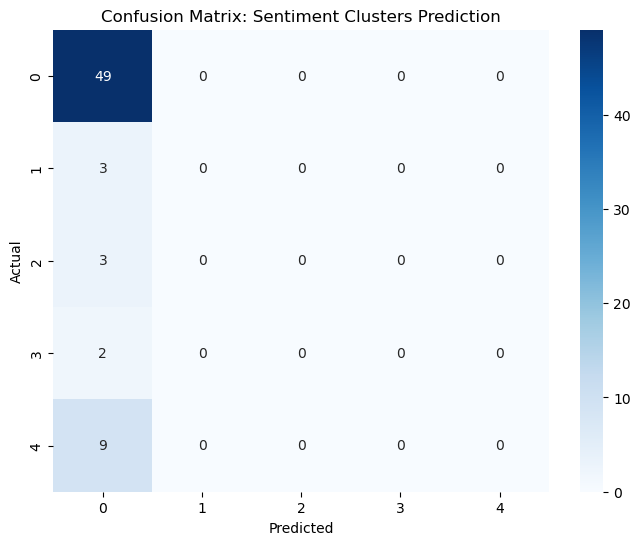

In [24]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Sentiment Clusters Prediction')
plt.show()

In [25]:
for cluster_id in sorted(df['sentiment_cluster'].unique()):
    print(f"\nSentiment Cluster {cluster_id}:")
    sentiments_in_cluster = df[df['sentiment_cluster'] == cluster_id]['Sentiment'].unique()
    for sentiment in sentiments_in_cluster:
        print(f" - {sentiment}")


Sentiment Cluster 0:
 -  Excitement 
 -  Elation       
 -  Contentment   
 -  Serenity      
 -  Empowerment   
 -  Enthusiasm    
 -  Loneliness 
 -  Indifference    
 -  Confusion       
 -  Numbness        
 -  Melancholy      
 -  Nostalgia       
 -  Ambivalence     
 -  Acceptance      
 -  Determination   
 -  Serenity        
 -  Contentment 
 -  Hopeful 
 -  Playful 
 -  Inspired 
 -  Despair 
 -  Bitterness 
 -  Frustrated 
 -  Joy 
 -  Embarrassed 
 -  Sad 
 -  Hate 
 -  Bad 
 -  Happy 

Sentiment Cluster 1:
 -  Neutral 

Sentiment Cluster 2:
 -  Gratitude     
 -  Gratitude 

Sentiment Cluster 3:
 -  Curiosity       
 -  Curiosity 

Sentiment Cluster 4:
 -  Positive  


In [26]:
df_test = df.iloc[X_test.indices] if hasattr(X_test, 'indices') else df.iloc[X_test.index]

df_test = df_test.copy()
df_test['predicted_sentiment_cluster'] = y_pred

In [27]:
for cluster_id in sorted(df_test['predicted_sentiment_cluster'].unique()):
    print(f"\nPredicted Sentiment Cluster {cluster_id}:")
    hashtags_in_cluster = df_test[df_test['predicted_sentiment_cluster'] == cluster_id]['hashtag_text']
    print(hashtags_in_cluster)


Predicted Sentiment Cluster 0:
262             #textbookjuggling #highschoolskills 
142                      #inspired #talestothestars 
250                   #kpopfangirl #highschoolmusic 
322         #artcollaboration #highschoolcreativity 
60     #serenity #peacefulmelody                    
                           ...                      
310          #photographyjourney #highschoolhobbies 
215                    #naturewonders #seniorgarden 
99         #acceptance #imperfectjourney            
103       #confusion #thoughtlabyrinth              
260             #crushfail #highschoolembarrassment 
Name: hashtag_text, Length: 66, dtype: object


In [28]:
from sentence_transformers import SentenceTransformer

In [29]:
model = SentenceTransformer('all-MiniLM-L6-v2')

sentiments = df['Sentiment'].unique()
sentiment_embeddings = model.encode(sentiments)

In [30]:
num_sentiment_clusters = 5  # You can choose 5, 6, 7, etc.
kmeans_sentiment = KMeans(n_clusters=num_sentiment_clusters, random_state=42)
sentiment_cluster_labels = kmeans_sentiment.fit_predict(sentiment_embeddings)

sentiment_df = pd.DataFrame({
    'Sentiment': sentiments,
    'sentiment_cluster': sentiment_cluster_labels
})
df = df.drop(columns=[col for col in df.columns if 'sentiment_cluster' in col])
df = df.merge(sentiment_df, how='left', on='Sentiment')
df.head()

C:\Users\zhous\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Hashtag1,Hashtag2,hashtag_text,cluster,sentiment_cluster
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,#nature,#park,#nature #park,0,4
1,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,#fitness,#workout,#fitness #workout,0,4
2,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,#travel,#adventure,#travel #adventure,0,4
3,5,5,Feeling grateful for the little things in lif...,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16,9,#gratitude,#positivevibes,#gratitude #positivevibes,0,4
4,6,6,Rainy days call for cozy blankets and hot coc...,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16,14,#rainydays,#cozy,#rainydays #cozy,0,4


In [31]:
X = df[['cluster']]
y = df['sentiment_cluster']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         1
           2       0.42      1.00      0.60        28
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        24

    accuracy                           0.42        66
   macro avg       0.08      0.20      0.12        66
weighted avg       0.18      0.42      0.25        66



C:\Users\zhous\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\zhous\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\zhous\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
for cluster_id in sorted(df['sentiment_cluster'].unique()):
    print(f"\nSentiment Cluster {cluster_id}:")
    sentiments_in_cluster = df[df['sentiment_cluster'] == cluster_id]['Sentiment'].unique()
    for sentiment in sentiments_in_cluster:
        print(f" - {sentiment}")


Sentiment Cluster 0:
 -  Serenity      
 -  Loneliness 
 -  Numbness        
 -  Melancholy      
 -  Nostalgia       
 -  Serenity        
 -  Despair 
 -  Bitterness 

Sentiment Cluster 1:
 -  Frustrated 

Sentiment Cluster 2:
 -  Excitement 
 -  Elation       
 -  Enthusiasm    
 -  Curiosity       
 -  Confusion       
 -  Hopeful 
 -  Playful 
 -  Curiosity 
 -  Joy 
 -  Embarrassed 
 -  Neutral 

Sentiment Cluster 3:
 -  Sad 
 -  Hate 
 -  Bad 

Sentiment Cluster 4:
 -  Positive  
 -  Contentment   
 -  Gratitude     
 -  Empowerment   
 -  Indifference    
 -  Ambivalence     
 -  Acceptance      
 -  Determination   
 -  Contentment 
 -  Inspired 
 -  Gratitude 
 -  Happy 


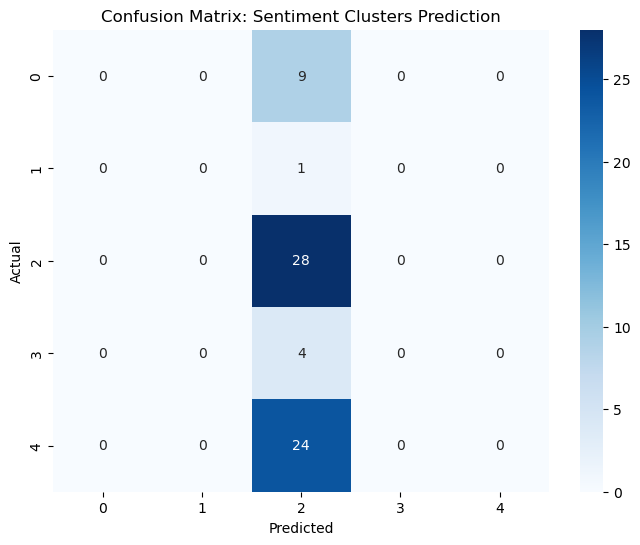

In [33]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Sentiment Clusters Prediction')
plt.show()

In [34]:
df.shape

(330, 20)

In [35]:
df_test = df.iloc[X_test.indices] if hasattr(X_test, 'indices') else df.iloc[X_test.index]

# Add predicted sentiment cluster
df_test = df_test.copy()
df_test['predicted_sentiment_cluster'] = y_pred

In [36]:
for cluster_id in sorted(df_test['predicted_sentiment_cluster'].unique()):
    print(f"\nPredicted Sentiment Cluster {cluster_id}:")
    hashtags_in_cluster = df_test[df_test['predicted_sentiment_cluster'] == cluster_id]['hashtag_text']
    print(hashtags_in_cluster)  # Show first 10 examples


Predicted Sentiment Cluster 2:
193                   #bookdiscoveries #teenreading 
314                 #teamspirit #highschoolprojects 
16          #career #milestone                      
303      #environmentalefforts #highschoolcommunity 
23           #teatime #sunset                       
                           ...                      
100        #determination #unparalleledheights      
63     #enthusiasm #artisticproject                 
180                #curiosity #treasuresofdiscovery 
188                           #joy #worldcuptriumph 
148                #loneliness #miragesofconnection 
Name: hashtag_text, Length: 66, dtype: object


In [74]:
from collections import Counter

for cluster_id in sorted(df_test['predicted_sentiment_cluster'].unique()):
    print(f"\nTop Hashtags for Predicted Sentiment Cluster {cluster_id}:")
    
    hashtags = df_test[df_test['predicted_sentiment_cluster'] == cluster_id]['hashtag_text'].str.cat(sep=' ').split()
    hashtag_counts = Counter(hashtags)
    
    for tag, count in hashtag_counts.most_common(10):  # Top 10 hashtags
        print(f"{tag}: {count}")


Top Hashtags for Predicted Sentiment Cluster 2:
#numbness: 4
#elation: 4
#gratitude: 2
#hopeful: 2
#contentment: 2
#empowerment: 2
#curiosity: 2
#bookdiscoveries: 1
#teenreading: 1
#teamspirit: 1


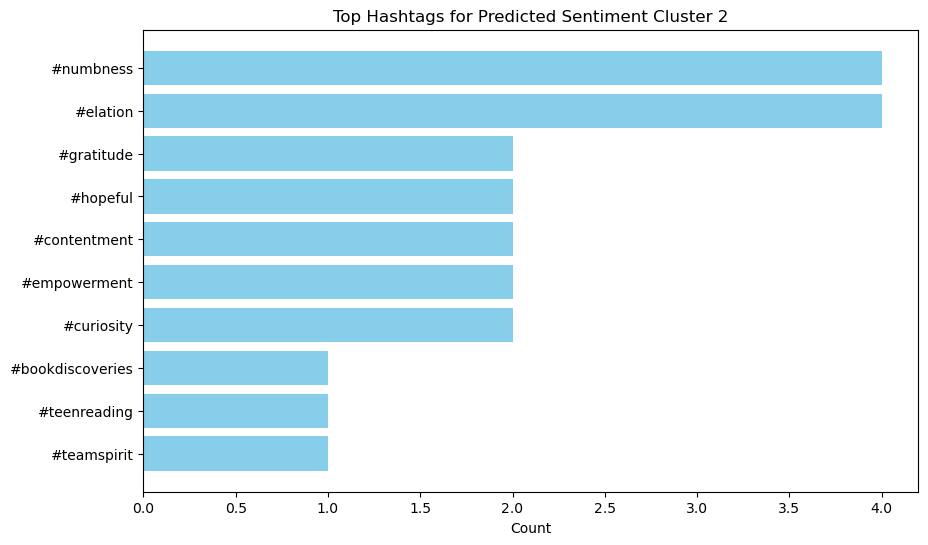

In [76]:
hashtag_counts = {
    '#numbness': 4,
    '#elation': 4,
    '#gratitude': 2,
    '#hopeful': 2,
    '#contentment': 2,
    '#empowerment': 2,
    '#curiosity': 2,
    '#bookdiscoveries': 1,
    '#teenreading': 1,
    '#teamspirit': 1
}

sorted_hashtags = sorted(hashtag_counts.items(), key=lambda x: x[1], reverse=True)
tags, counts = zip(*sorted_hashtags)

plt.figure(figsize=(10, 6))
plt.barh(tags, counts, color='skyblue')
plt.gca().invert_yaxis()  # Highest count at top
plt.xlabel('Count')
plt.title('Top Hashtags for Predicted Sentiment Cluster 2')
plt.show()